In [ ]:
#@title 🌐 🐍 Imports and Installs

import numpy as np
from skimage.io import imshow as sk_imshow
from skimage.io import imread as sk_imread
import matplotlib.pyplot as plt


# import os
# import pkg_resources
# import subprocess
# import sys

# # Function to check the library version
# def get_package_version(package_name):
#     try:
#         return pkg_resources.get_distribution(package_name).version
#     except pkg_resources.DistributionNotFound:
#         return None

# # Package details
# package = 'scikit-image'
# desired_version = '0.22.0'

# # Check the current version
# current_version = get_package_version(package)

# # Compare and install if necessary
# if current_version != desired_version:
#     print(f"Installing {package} version {desired_version}...")
#     subprocess.check_call([sys.executable, "-m", "pip", "install", f"{package}=={desired_version}"])

#     # Restart the kernel
#     print("Restarting kernel...")
#     os.kill(os.getpid(), 9)
# else:
#     print(f"{package} version {desired_version} is already installed.")

# New Section

In [ ]:
### For debugging  -- reimport lib if local changes are made

# import importlib
# import sys
# importlib.reload(sys.modules['extended_depth_of_focus'])
# from extended_depth_of_focus import best_focus_image
# best_focus_image?

In [ ]:
### img raw set for all / most tests


### Test
import matplotlib.pyplot as plt
from skimage.data import cells3d
image_raw = cells3d()[:,1,...] # nuclei\ Z, C, Y, X

image_raw # Z, Y, X

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2720  100  2720    0     0   7845      0 --:--:-- --:--:-- --:--:--  7861


Image shape: (60, 256, 256)
Displaying only the last two dims (of the "middle" slices)


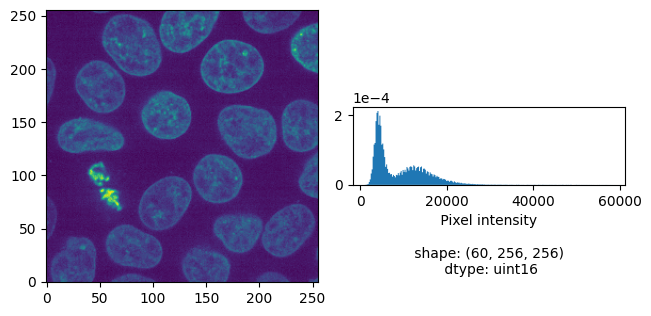

In [ ]:
#@title ## Test `hist_imshow(image, bins = 256)`


!curl -O https://raw.githubusercontent.com/PanosOik/utils/main/hist_imshow.py
from hist_imshow import hist_imshow

hist_imshow?



fig = hist_imshow(image_raw)

Image shape: (60, 256, 256)
Displaying only the last two dims (of the "middle" slices)


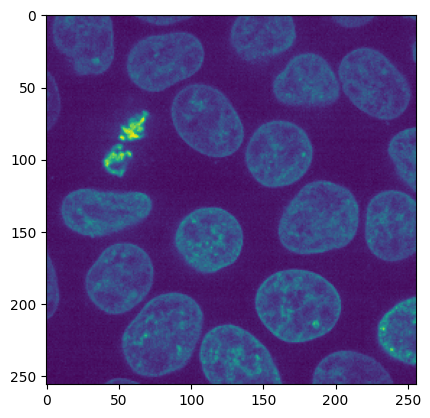

In [ ]:
### Test new func

img__ = hist_imshow(image_raw, return_image_only= True)
plt.imshow(img__)

## Test `_my_clahe_`

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.exposure import rescale_intensity


In [ ]:
#@markdown ``` def clahe(image, clip_limit = 0.02) ```
### Preprocess with CLAHE, and update the filenames (after CLAHE)

!curl -O https://raw.githubusercontent.com/PanosOik/utils/main/clahe_equalize_adapthist.py
###   ^ -O means to create an output file with the same name as the one downloaded
from clahe_equalize_adapthist import _my_clahe_
_my_clahe_?

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11769  100 11769    0     0  22739      0 --:--:-- --:--:-- --:--:-- 22764


In [ ]:
### Import toy 3d dataset

from skimage.data import cells3d
image_raw = cells3d()[:,1,...] # nuclei\
print(image_raw.shape) # Z, Y, X
print(image_raw.dtype)

(60, 256, 256)
uint16


In [ ]:
image_raw = rescale_intensity(image_raw, out_range = np.float64)
print(image_raw.dtype)

float64


In [ ]:
clahe_img = _my_clahe_(image_raw.T, kernel_size = [20,20,1], clip_limit = 0.03).T
# equalize_adapthist_(image,

Image shape: (60, 256, 256)
Displaying only the last two dims (of the "middle" slices)
Image shape: (60, 256, 256)
Displaying only the last two dims (of the "middle" slices)


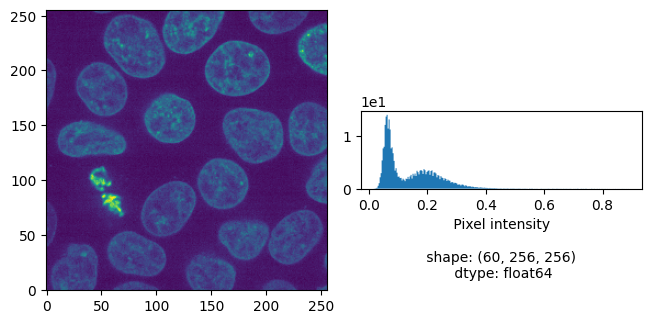

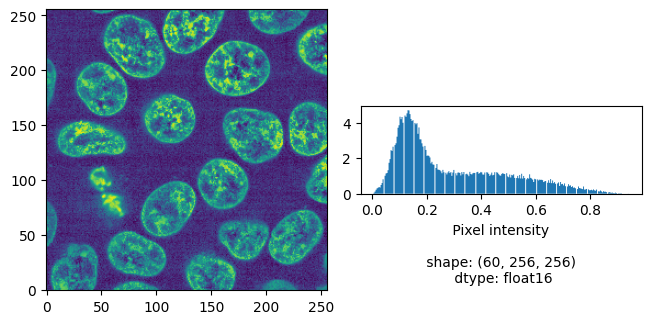

In [ ]:
# fig, axes = plt.subplots(nrows = 1, ncols = 2, layout = 'constrained')

# axes[0].imshow(image_raw[30, ...])
# print(image_raw.dtype)

fig = hist_imshow(image_raw)

# axes[1].imshow(clahe_img[30, ...])
# print(clahe_img.dtype)

fig = hist_imshow(clahe_img)


In [ ]:
clahe_0_01 = _my_clahe_(image_raw.T, kernel_size = [20,20,1], clip_limit = 0.01).T
sequential_clahe = _my_clahe_(clahe_0_01.T, kernel_size = [20,20,1], clip_limit = 0.001).T

cumulative_clahe = _my_clahe_(image_raw.T, kernel_size = [20,20,1], clip_limit = 0.02).T

Image shape: (60, 256, 256)
Displaying only the last two dims (of the "middle" slices)
Image shape: (60, 256, 256)
Displaying only the last two dims (of the "middle" slices)
Image shape: (60, 256, 256)
Displaying only the last two dims (of the "middle" slices)


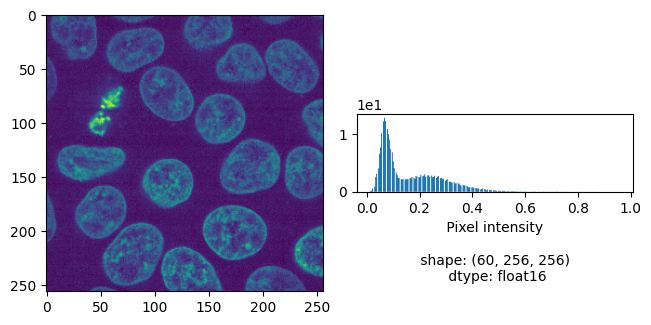

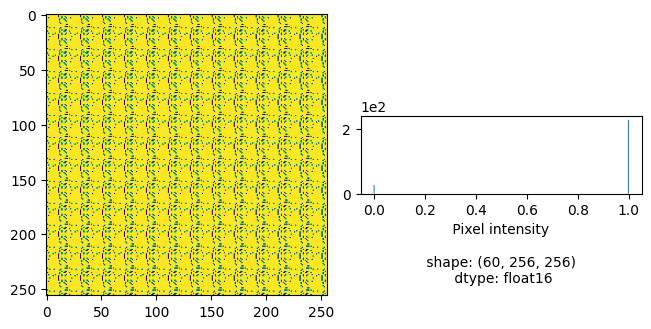

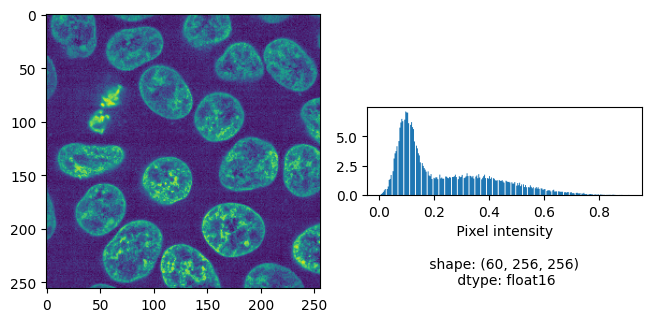

In [ ]:
fig = hist_imshow(clahe_0_01)


fig = hist_imshow(sequential_clahe)



fig = hist_imshow(cumulative_clahe)

In [ ]:
def test_my_clahe() -> None:
    assert clahe_img.dtype == 'float16'


### Test parallelized execution (dask vs skimage apply parallel)

In [ ]:
import numpy as np
import dask.array as da

from skimage.color import rgb2hsv
im = np.random.randint(0, 256, (3000, 3000, 3)) # example image

# applying the function to the image
result = rgb2hsv(im)



In [ ]:
# using dask to parallelize the function over chunks of the image
result_dask = da.map_blocks(
    rgb2hsv,
    da.from_array(
        im,
        chunks=(1000, 1000, 3), # shape of the chunks processed in parallel
    ),
    dtype='float64', # the output dtype
).compute()

assert(np.allclose(result, result_dask)) # make sure the result stays the same

In [ ]:
import timeit

%timeit result = rgb2hsv(im)




3.96 s ± 509 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
result_dask = da.map_blocks(
    rgb2hsv,
    da.from_array(
        im,
        chunks=(1000, 1000, 3), # shape of the chunks processed in parallel
    ),
    dtype='float64', # the output dtype
).compute()

2.91 s ± 356 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Plt animations

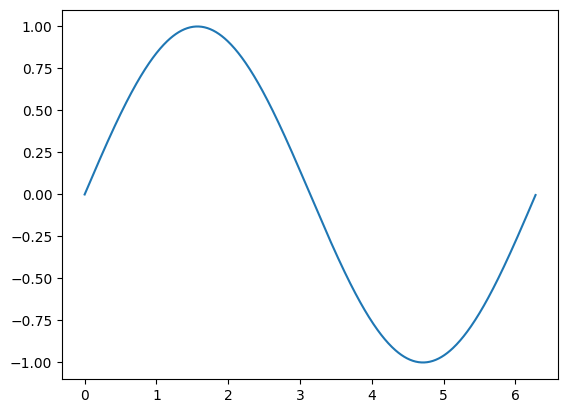

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

In [ ]:
#@title Try plt animation



from matplotlib import rc, animation
from IPython.display import HTML


import matplotlib.pyplot as plt
import numpy as np

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.close()


ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=100, interval=100, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim


## Test image dimension reorder

In [ ]:
import numpy as np
import dask.array as da
# import zarr


def reorder_image_dims(image, reorder_dims=None):
    """
    Reorders the dimensions of an image array.

    Parameters:
    image (np.ndarray): The image array.
    reorder_dims (tuple): A tuple of two strings. The first string represents the current
                          dimension order, and the second string represents the target dimension order.

    Returns:
    np.ndarray: The image array with reordered dimensions if reorder_dims is provided.
                Otherwise, returns the original image array.
    """
    # Check if reorder_dims is provided and is valid
    if reorder_dims and len(reorder_dims) == 2:
        current_order, target_order = reorder_dims

        # Ensure that both strings have the same length and contain the same characters
        if sorted(current_order) == sorted(target_order):
            # Correctly map current dimensions to target dimensions
            dim_map = {current_order[i]: i for i in range(len(current_order))}
            new_order = [dim_map[dim] for dim in target_order]

            # Reorder dimensions using transpose()
            # Use appropriate transpose function based on array type
            if isinstance(image, np.ndarray):
                return np.transpose(image, axes=new_order)
            elif isinstance(image, da.Array):
                return image.transpose(new_order)
            elif isinstance(image, zarr.Array):
                return image.transpose(new_order)
            else:
                raise TypeError("Unsupported array type.")
        else:
            raise ValueError("Current and target dimension orders do not match.")
    else:
        # Return the original image if no reorder_dims is provided or is invalid
        raise ValueError("reorder_dims uple of invalid orma -- see docstring")
        print('Returning original')
        return image

# Example usage
# Assuming 'image' is your NumPy array (or compatible array) and you want to reorder dimensions
# from 'SCTZYX' to 'SCTXYZ'
# new_image = reorder_image_dims(image, reorder_dims=('SCTZYX', 'SCTXYZ'))


In [ ]:
import numpy as np

# Test function
def test_reorder_image_dims():
    # Create a random 4D array with distinct dimensions (e.g., 2x3x4)
    image = np.random.rand(2, 3, 4, 5)

    # Define current and target dimension orders
    current_order = 'XTYZ'
    target_order = 'TZYX'

    # Print the original array
    print("Original array shape:\n", image.shape)

    # Call our function to reorder dimensions
    reordered_image = reorder_image_dims(image, reorder_dims=(current_order, target_order))

    # Print the reordered array
    print("Reordered array shape:\n", reordered_image.shape)

    # Check the shape of the reordered array to ensure it matches our expectations
    assert reordered_image.shape == (3, 5, 4, 2), "Reordering dimensions failed."

    # Additional check: The transpose of the transpose should return to the original order
    re_transposed_image = reorder_image_dims(reordered_image, reorder_dims=(target_order, current_order))
    assert re_transposed_image.shape == image.shape, "Double transpose should return to original shape."

    print("Test passed!")

# Run the test
test_reorder_image_dims()

# Test function
def test_reorder_image_dims_5D():
    # Create a random 4D array with distinct dimensions (e.g., 2x3x4)
    image = np.random.rand(2, 3, 4, 5, 10)

    # Define current and target dimension orders
    current_order = 'XTYZS'
    target_order = 'TZYXS'

    # Print the original array
    print("Original array shape:\n", image.shape)

    # Call our function to reorder dimensions
    reordered_image = reorder_image_dims(image, reorder_dims=(current_order, target_order))

    # Print the reordered array
    print("Reordered array shape:\n", reordered_image.shape)

    # Check the shape of the reordered array to ensure it matches our expectations
    assert reordered_image.shape == (3, 5, 4, 2, 10), "Reordering dimensions failed."

    # Additional check: The transpose of the transpose should return to the original order
    re_transposed_image = reorder_image_dims(reordered_image, reorder_dims=(target_order, current_order))
    assert re_transposed_image.shape == image.shape, "Double transpose should return to original shape."

    print("Test passed!")

# Run the test
test_reorder_image_dims_5D()


Original array shape:
 (2, 3, 4, 5)
Reordered array shape:
 (3, 5, 4, 2)
Test passed!
Original array shape:
 (2, 3, 4, 5, 10)
Reordered array shape:
 (3, 5, 4, 2, 10)
Test passed!


## Test dimensionality parser

In [ ]:
!curl -O https://raw.githubusercontent.com/PanosOik/utils/main/dimensionality_parser.py
from dimensionality_parser import dimensionality_parser
dimensionality_parser?

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6309  100  6309    0     0  14058      0 --:--:-- --:--:-- --:--:-- 14082


In [ ]:
### Tests for `dimensionality_parser`
import numpy as np

@dimensionality_parser(target_dims='ZYX')
def max_z_projection(image_slice):
    return np.max(image_slice, axis=0)

# --- Test 1 --- 6 dims
print('Test 1')
image = np.random.rand(5, 2, 3, 4, 256, 256)
processed_image = max_z_projection(image, iterate_dims={'S' :'0', 'C': '0', 'T': '0:3:2'})

# --- Test 2 --- 5 dims
print('Test 2')
image = np.random.rand(2, 10, 4, 256, 256)
processed_image = max_z_projection(image, iterate_dims={'C': '0:2', 'T': '0:3:2'})

# --- Test 3 --- 4 dims
print('Test 3')
image = np.random.rand(3, 4, 256, 256)
processed_image = max_z_projection(image)


Test 1
image_dims :  SCTZYX
dummy_input_shape :  (4, 256, 256)
dummy_output_shape :  (256, 256)
reduced_dims :  ['Z']
output_shape :  [5, 2, 3, 256, 256]
sliced_output_shape :  [1, 1, 2, 256, 256]
result.shape :  (1, 1, 2, 256, 256)
Test 2
image_dims :  CTZYX
dummy_input_shape :  (4, 256, 256)
dummy_output_shape :  (256, 256)
reduced_dims :  ['Z']
output_shape :  [2, 10, 256, 256]
sliced_output_shape :  [2, 2, 256, 256]
result.shape :  (2, 2, 256, 256)
Test 3
image_dims :  TZYX
dummy_input_shape :  (4, 256, 256)
dummy_output_shape :  (256, 256)
reduced_dims :  ['Z']
output_shape :  [3, 256, 256]
sliced_output_shape :  [3, 256, 256]
result.shape :  (3, 256, 256)


In [ ]:
@dimensionality_parser(target_dims='ZYX')
def n_dim_best_focus_image(image_slice):
    return best_focus_image(image_slice)




# print(img_raw.shape)

# processed_image = n_dim_best_focus_image(img_raw[:,1,...])


# print(processed_image.shape)

# skimage.io.imsave(filename.replace('.tif','_ch1_proj.tif'), processed_image)


## Test extended depth of focus

## Test maxproj_registration python

In [ ]:
!curl -O https://raw.githubusercontent.com/PanosOik/utils/main/maxproj_registration.py
from maxproj_registration import apply_drift_correction_2D
from maxproj_registration import zero_shift_multi_dimensional

apply_drift_correction_2D?

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8798  100  8798    0     0  28311      0 --:--:-- --:--:-- --:--:-- 28380


(256, 256)
uint16


Applying Drift Correction: 100%|██████████| 2/2 [00:00<00:00, 535.19it/s]


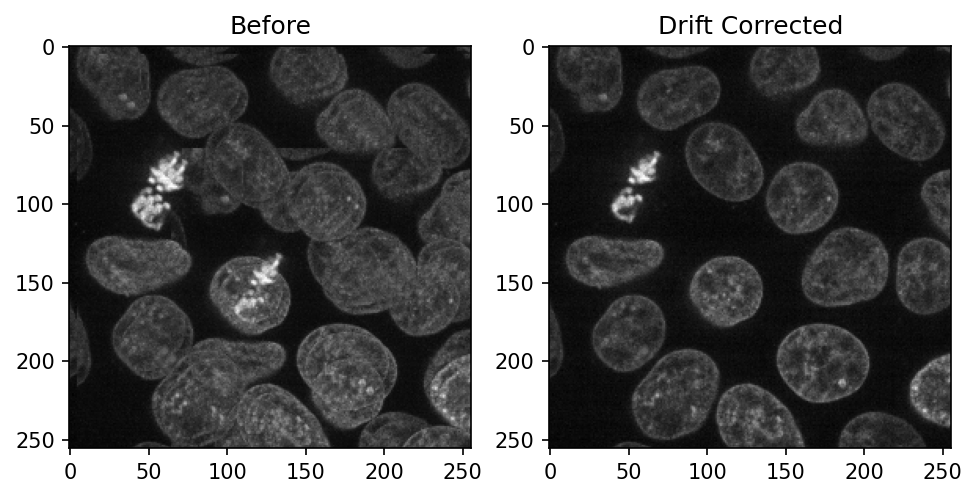

In [ ]:
from skimage.data import cells3d
image_raw = cells3d()[30,1,...] # nuclei\ Z, C, Y, X
print(image_raw.shape) # Y, X
print(image_raw.dtype)

video_data = np.array([ image_raw , zero_shift_multi_dimensional(image_raw, [5,5]), zero_shift_multi_dimensional(image_raw, [65,65])])

drift_corrected, drift_table = apply_drift_correction_2D(video_data)


### Plot result



fig, axes = plt.subplot_mosaic([['Before', 'Drift Corrected']], dpi = 150, layout = 'constrained')

axes['Before'].imshow(np.max(video_data, axis = 0), cmap = 'gray')
axes['Drift Corrected'].imshow(np.max(drift_corrected, axis = 0), cmap = 'gray')

for label, ax in axes.items():
    ax.set_title(label)

In [ ]:
from skimage.registration import phase_cross_correlation

shift_y, error, diffphase = phase_cross_correlation(video_data[0].astype(np.float16),
                                                    video_data[1].astype(np.float16),
                                                    overlap_ratio = 0.00001)
shift_y, error, diffphase

(array([-5., -5.], dtype=float32), 1.0, -1.1878215e-08)

Image shape: (256, 256)


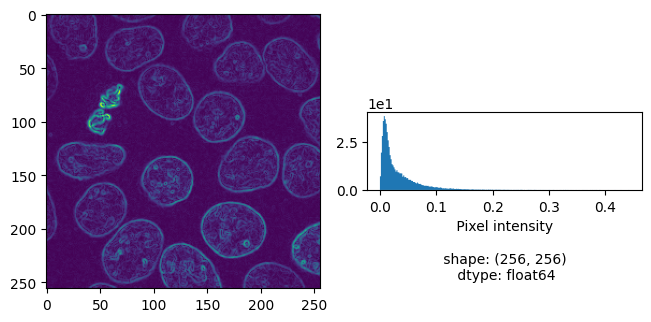

In [ ]:
from skimage.filters import scharr
img_scharr = scharr(video_data[0])
fig = hist_imshow(img_scharr)

## Test `hist_imshow(image, bins = 256)`

In [ ]:
!curl -O https://raw.githubusercontent.com/PanosOik/utils/main/hist_imshow.py
from hist_imshow import hist_imshow

hist_imshow?

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1226  100  1226    0     0   4627      0 --:--:-- --:--:-- --:--:--  4643


Image shape: (60, 256, 256)
Displaying only the last two dims (of the "middle" slices)
(30, slice(None, None, None), slice(None, None, None))


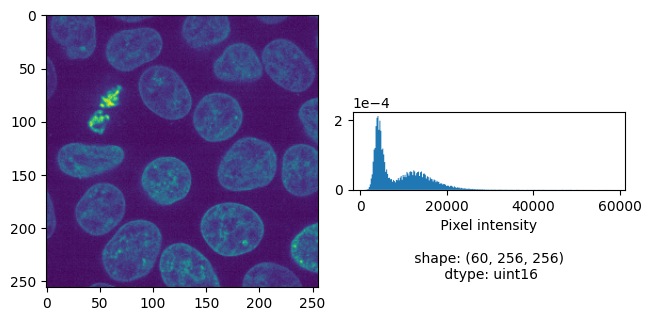

In [ ]:
### Test
import matplotlib.pyplot as plt
from skimage.data import cells3d
image_raw = cells3d()[:,1,...] # nuclei\ Z, C, Y, X



fig = hist_imshow(image_raw)

In [ ]:
## Test `hist_imshow(image, bins = 256)`

!curl -O https://raw.githubusercontent.com/PanosOik/utils/main/hist_imshow.py
from hist_imshow import hist_imshow

hist_imshow?

### Test
import matplotlib.pyplot as plt
from skimage.data import cells3d
image_raw = cells3d()[:,1,...] # nuclei\ Z, C, Y, X



fig = hist_imshow(image_raw)

## Test `color_coded_projection.py`

In [ ]:
!curl -O https://raw.githubusercontent.com/PanosOik/utils/main/color_coded_projection.py
from color_coded_projection import color_coded_projection

color_coded_projection?

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1963  100  1963    0     0   6613      0 --:--:-- --:--:-- --:--:--  6631


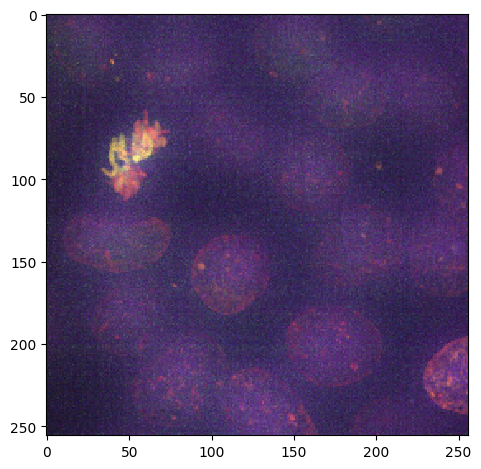

In [ ]:
### Test
import matplotlib.pyplot as plt
from skimage.data import cells3d
from skimage.io import imshow
image_raw = cells3d()[:,1,...] # nuclei\ Z, C, Y, X



proj = color_coded_projection(image_raw)
imshow(proj)

### Test gamma correction by degrading the cells3d and then correcting it again

In [ ]:
### Test -- degrade with exponential decay plus a little bit on noise through the depth